In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

params = {
    'geo': ['IT','EA20'],
    'indic_bt': 'PRD',
    's_adj':'SCA',
    'unit': 'I21',
    'nace_r2':'C'
}
df = fetch_eurostat_data("sts_inpr_m", params)

In [29]:
df[['nace_r2_code', 'nace_r2_label', 's_adj_code', 's_adj_label','unit_code', 'unit_label', 'geo_code', 'geo_label', 'time_code','time_label', 'value', 'time']]

,nace_r2_code,nace_r2_label,s_adj_code,s_adj_label,unit_code,unit_label,geo_code,geo_label,time_code,time_label,value,time
0,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",EA20,Euro area – 20 countries (from 2023),1991-01,1991-01,76.3,1991-01-16
1,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",EA20,Euro area – 20 countries (from 2023),1991-02,1991-02,75.1,1991-02-16
2,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",EA20,Euro area – 20 countries (from 2023),1991-03,1991-03,74.8,1991-03-16
3,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",EA20,Euro area – 20 countries (from 2023),1991-04,1991-04,74.2,1991-04-16
4,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",EA20,Euro area – 20 countries (from 2023),1991-05,1991-05,73.6,1991-05-16
...,...,...,...,...,...,...,...,...,...,...,...,...
833,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",IT,Italy,2025-01,2025-01,94.2,2025-01-16
834,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",IT,Italy,2025-02,2025-02,92.5,2025-02-16
835,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",IT,Italy,2025-03,2025-03,93.0,2025-03-16
836,C,Manufacturing,SCA,Seasonally and calendar adjusted data,I21,"Index, 2021=100",IT,Italy,2025-04,2025-04,94.1,2025-04-16


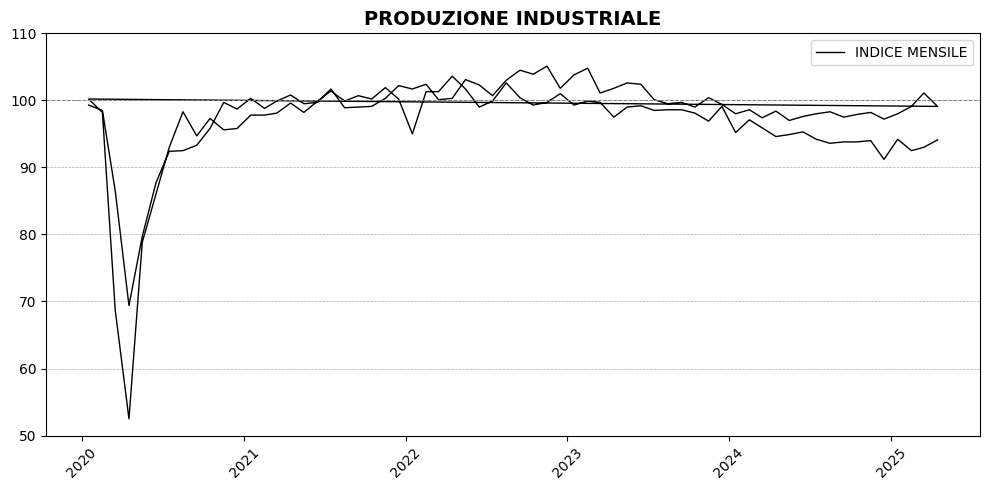

In [30]:
import matplotlib.pyplot as plt

# Filtra il periodo gennaio 2020 – aprile 2025
df_filtered = df[(df['time'] >= '2020-01-01') & (df['time'] <= '2025-04-30')].copy()

# Calcola media mobile a 3 mesi
df_filtered['MA3'] = df_filtered['value'].rolling(window=3).mean()

# Crea il grafico
plt.figure(figsize=(10, 5))

# Linea indice mensile
plt.plot(df_filtered['time'], df_filtered['value'], color='black', linewidth=1, label='INDICE MENSILE')

# Linea media mobile 3 mesi
#plt.plot(df_filtered['time'], df_filtered['MA3'], color='red', linewidth=2, label='MEDIA MOBILE A TRE MESI')

# Titolo e asse Y
plt.title("PRODUZIONE INDUSTRIALE", fontsize=14, fontweight='bold')
plt.axhline(100, linestyle='--', color='gray', linewidth=0.7)
plt.yticks(range(50, 111, 10))
plt.ylim(50, 110)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Asse X
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


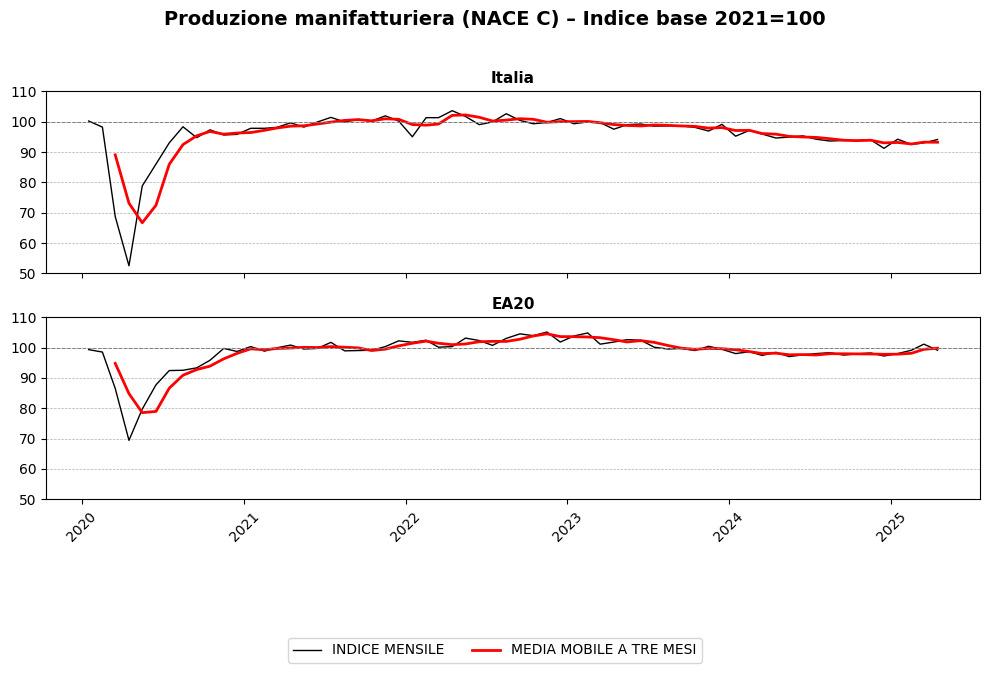

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra periodo
df = df[(df['time'] >= '2020-01-01') & (df['time'] <= '2025-04-30')].copy()

# Media mobile 3 mesi
df['MA3'] = df.groupby('geo_code')['value'].transform(lambda x: x.rolling(window=3).mean())

# Crea il grafico
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

colori = {'value': 'black', 'MA3': 'red'}
etichette = {'value': 'INDICE MENSILE', 'MA3': 'MEDIA MOBILE A TRE MESI'}

for ax, geo, titolo in zip(axs, ['IT', 'EA20'], ['Italia', 'EA20']):
    df_geo = df[df['geo_code'] == geo]
    ax.plot(df_geo['time'], df_geo['value'], color=colori['value'], linewidth=1)
    ax.plot(df_geo['time'], df_geo['MA3'], color=colori['MA3'], linewidth=2)
    ax.set_title(titolo, fontsize=11, fontweight='bold')
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.axhline(100, linestyle='--', color='gray', linewidth=0.7)
    ax.set_ylim(50, 110)

# Legenda globale più distanziata sotto
linee = [plt.Line2D([0], [0], color=colori[k], linewidth=2 if k == 'MA3' else 1) for k in etichette]
labels = list(etichette.values())
fig.legend(
    linee,
    labels,
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.5, -0.12),  # <– aumenta spazio (da -0.02 a -0.12)
    fontsize=10
)

# Titolo generale
fig.suptitle("Produzione manifatturiera (NACE C) – Indice base 2021=100", fontsize=14, fontweight='bold')

# Lascia spazio per la legenda in basso
plt.tight_layout(rect=[0, 0.1, 1, 0.96])  # <– aumenta margine inferiore
plt.xticks(rotation=45)
plt.show()




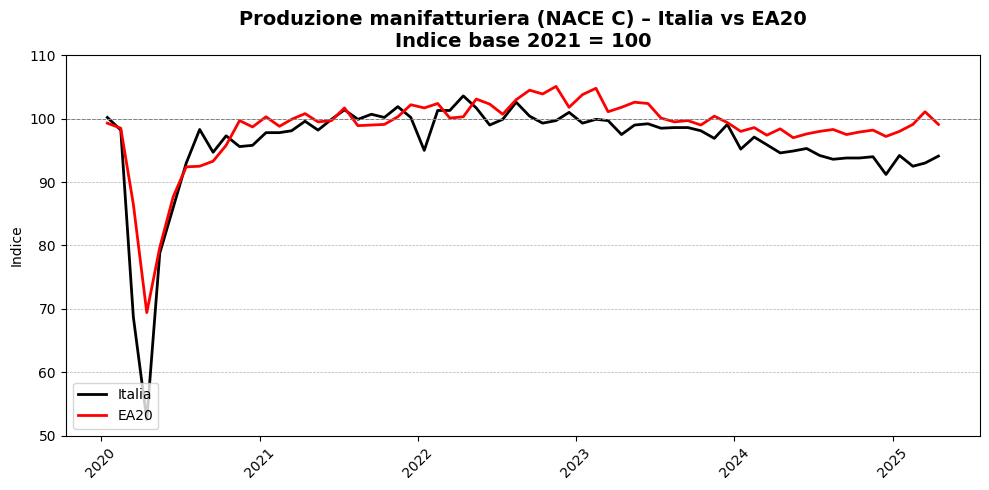

In [34]:
import matplotlib.pyplot as plt

# Filtra periodo gennaio 2020 – aprile 2025
df_plot = df[(df['time'] >= '2020-01-01') & (df['time'] <= '2025-04-30')].copy()

# Crea il grafico
plt.figure(figsize=(10, 5))

# Traccia entrambe le linee
for geo, colore, label in zip(['IT', 'EA20'], ['black', 'red'], ['Italia', 'EA20']):
    serie = df_plot[df_plot['geo_code'] == geo]
    plt.plot(serie['time'], serie['value'], label=label, color=colore, linewidth=2)

# Aggiungi linea orizzontale a 100
plt.axhline(100, linestyle='--', color='gray', linewidth=0.7)

# Dettagli grafico
plt.title("Produzione manifatturiera (NACE C) – Italia vs EA20\nIndice base 2021 = 100", fontsize=14, fontweight='bold')
plt.ylabel("Indice")
plt.xticks(rotation=45)
plt.yticks(range(50, 111, 10))
plt.ylim(50, 110)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


## più nazioni

<positron-console-cell-59>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.


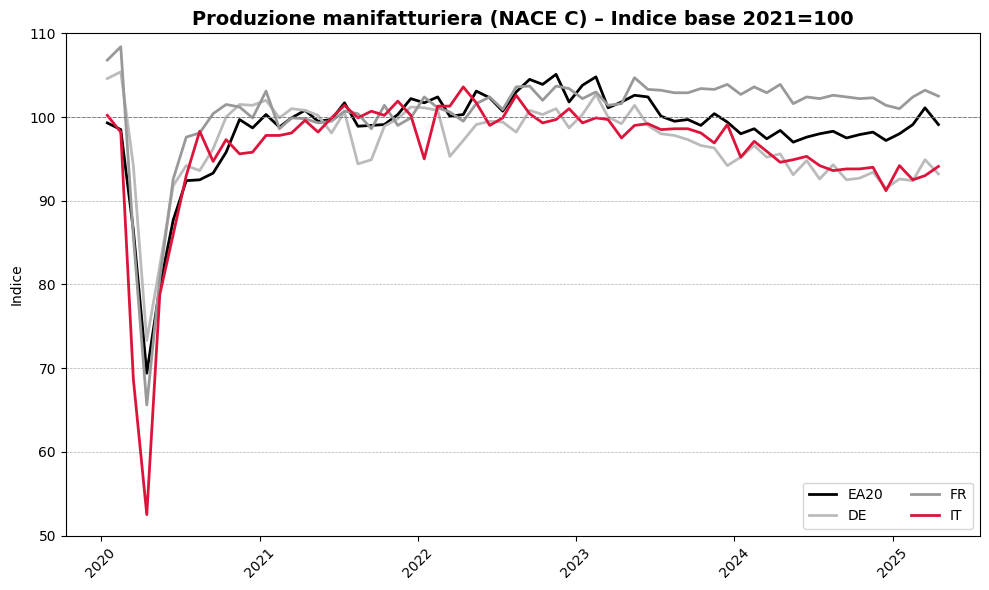

In [59]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

params = {
    'geo': ['IT', 'EA20', 'FR', 'DE'],  # Italia, Area Euro, Francia, Germania
    'indic_bt': 'PRD',
    's_adj': 'SCA',
    'unit': 'I21',
    'nace_r2': 'C'
}
df = fetch_eurostat_data("sts_inpr_m", params)

# Filtro periodo
#df_plot = df[(df['time'] >= '2020-01-01') & (df['time'] <= '2025-04-30')].copy()

# Lista dei paesi nel dataset
paesi = df_plot['geo_code'].unique()

# Colormap automatica (fino a 10 colori distinti)
colormap = cm.get_cmap('tab10', len(paesi))  # oppure 'tab20', 'Set1', ecc.
palette = {
    'IT': 'crimson',    # Rosso acceso per l’Italia
    'EA20': 'black',    # Nero per l’Area Euro
    'FR': '#999999',    # Grigio medio
    'DE': '#bbbbbb',    # Grigio chiaro
    'ES': '#dddddd'     # Ancora più chiaro
}


# Plot
plt.figure(figsize=(10, 6))

for idx, geo in enumerate(paesi):
    serie = df_plot[df_plot['geo_code'] == geo]
    plt.plot(serie['time'], serie['value'], label=geo, color=palette.get(geo, '#cccccc'), linewidth=2)


# Linea orizzontale a 100
plt.axhline(100, linestyle='--', color='gray', linewidth=0.7)

# Dettagli grafico
plt.title("Produzione manifatturiera (NACE C) – Indice base 2021=100", fontsize=14, fontweight='bold')
plt.ylabel("Indice")
plt.xticks(rotation=45)
plt.yticks(range(50, 111, 10))
plt.ylim(50, 110)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right', ncol=2)  # ncol=2 se hai molti paesi
plt.tight_layout()
plt.show()



In [86]:
df_ea20 = df[
    (df['geo_code'] == 'EA20') &
    (df['nace_r2_code'] == 'C') &
    (df['s_adj_code'] == 'SCA')  # <- usa SCA come da tuo dataset
].copy()

# Ordina cronologicamente
df_ea20.sort_values('time', inplace=True)
df_ea20.reset_index(drop=True, inplace=True)

# Calcola variazioni
df_ea20['var_mom'] = df_ea20['value'].pct_change() * 100
df_ea20['var_yoy'] = df_ea20['value'].pct_change(periods=12) * 100
df_ea20[['geo_code', 'value', 'time','var_mom','var_yoy']].tail()

,geo_code,value,time,var_mom,var_yoy
408,EA20,98.0,2025-01-16,0.823045,0.000000
409,EA20,99.1,2025-02-16,1.122449,0.507099
410,EA20,101.1,2025-03-16,2.018163,3.798768
411,EA20,99.1,2025-04-16,-1.978239,0.711382
412,EA20,100.5,2025-05-16,1.412714,3.608247


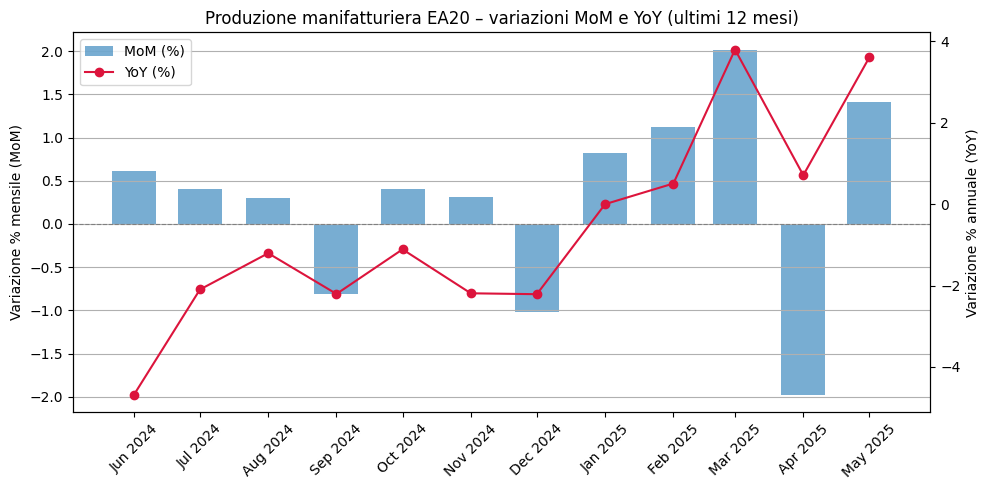

In [85]:
import matplotlib.pyplot as plt

# Uso df_ea20 come richiesto (ultimi 12 mesi disponibili)
df_last12 = df_ea20.sort_values("time").tail(12)

# Grafico
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barre MoM
ax1.bar(df_last12['time'], df_last12['var_mom'], width=20, label='MoM (%)', alpha=0.6)
ax1.set_ylabel('Variazione % mensile (MoM)')
ax1.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax1.set_title('Produzione manifatturiera EA20 – variazioni MoM e YoY (ultimi 12 mesi)')
ax1.grid(True, axis='y')

# Linea YoY su asse secondario
ax2 = ax1.twinx()
ax2.plot(df_last12['time'], df_last12['var_yoy'], color='crimson', marker='o', label='YoY (%)')
ax2.set_ylabel('Variazione % annuale (YoY)')

# Legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Asse X con mesi
ax1.set_xticks(df_last12['time'])
ax1.set_xticklabels(df_last12['time'].dt.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()


    geo_code  value       time   var_mom   var_yoy
420       IT   94.2 2025-01-16  3.289474 -1.050420
421       IT   92.5 2025-02-16 -1.804671 -4.737384
422       IT   93.0 2025-03-16  0.540541 -3.023983
423       IT   94.1 2025-04-16  1.182796 -0.528541
424       IT   93.4 2025-05-16 -0.743889 -1.580611


    geo_code  value       time   var_mom   var_yoy
420       IT   94.2 2025-01-16  3.289474 -1.050420
421       IT   92.5 2025-02-16 -1.804671 -4.737384
422       IT   93.0 2025-03-16  0.540541 -3.023983
423       IT   94.1 2025-04-16  1.182796 -0.528541
424       IT   93.4 2025-05-16 -0.743889 -1.580611


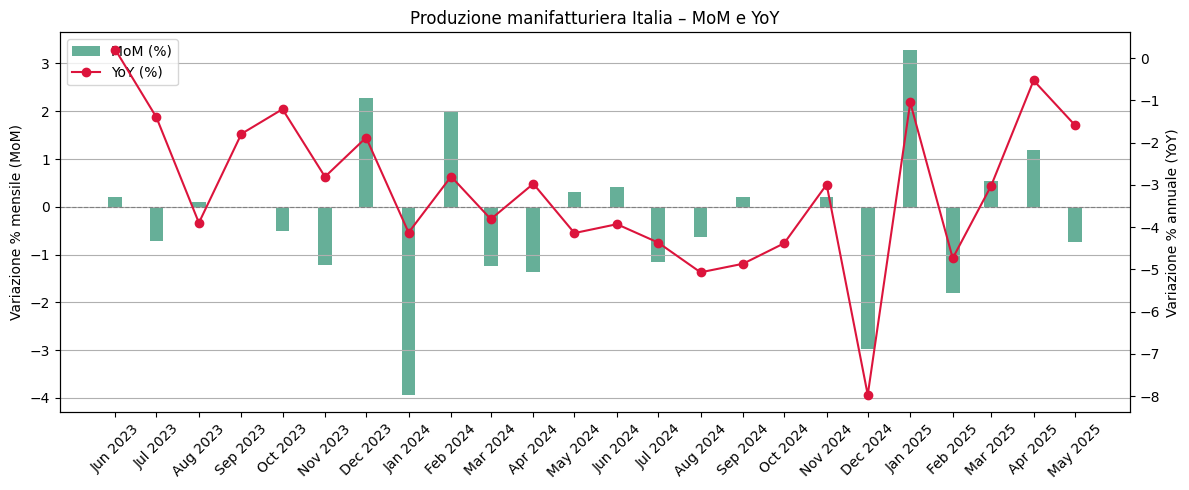

In [97]:
df_it = df[
    (df['geo_code'] == 'IT') &
    (df['nace_r2_code'] == 'C') &
    (df['s_adj_code'] == 'SCA')  # <- usa SCA come da tuo dataset
].copy()

# Ordina cronologicamente
df_it.sort_values('time', inplace=True)
df_it.reset_index(drop=True, inplace=True)

# Calcola variazioni
df_it['var_mom'] = df_it['value'].pct_change() * 100
df_it['var_yoy'] = df_it['value'].pct_change(periods=12) * 100
print(df_it[['geo_code', 'value', 'time','var_mom','var_yoy']].tail())

# Consideriamo solo gli ultimi 5 mesi per il grafico
df_it_last5 = df_it.sort_values("time").tail(24)

# Grafico
fig, ax1 = plt.subplots(figsize=(12, 5))

# Barre MoM
ax1.bar(df_it_last5['time'], df_it_last5['var_mom'], width=10, label='MoM (%)', alpha=0.6, color='#007a53')
ax1.set_ylabel('Variazione % mensile (MoM)')
ax1.axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax1.set_title('Produzione manifatturiera Italia – MoM e YoY')
ax1.grid(True, axis='y')

# Linea YoY
ax2 = ax1.twinx()
ax2.plot(df_it_last5['time'], df_it_last5['var_yoy'], color='crimson', marker='o', label='YoY (%)')
ax2.set_ylabel('Variazione % annuale (YoY)')

# Legenda combinata
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Asse X con etichette mese
ax1.set_xticks(df_it_last5['time'])
ax1.set_xticklabels(df_it_last5['time'].dt.strftime('%b %Y'), rotation=45)

plt.tight_layout()
plt.show()

## più nace_r2 Italia

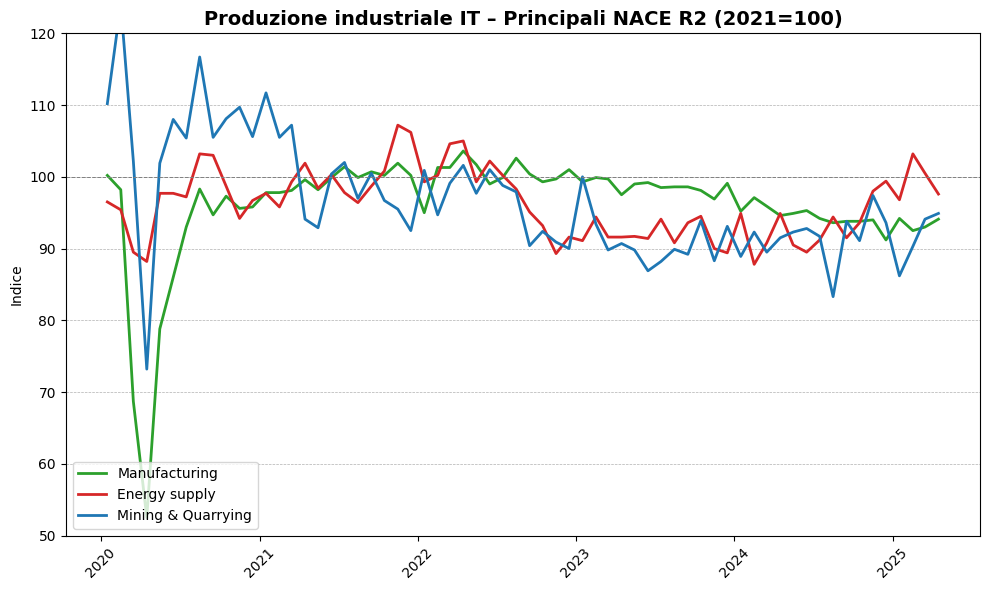

In [49]:
params = {
    'geo': 'IT',  # Italia, Area Euro, Francia, Germania
    'indic_bt': 'PRD',
    's_adj': 'SCA',
    'unit': 'I21',
    'nace_r2': ['B','C','D']
}
df = fetch_eurostat_data("sts_inpr_m", params)

# Supponendo df già scaricato con geo='IT' e vari nace_r2
df_it = df[df['geo_code'] == 'IT'].copy()

settori_principali = ['C', 'D', 'B']  # puoi cambiarli o ordinarli

df_it = df[df['geo_code'] == 'IT'].copy()
df_it = df_it[df_it['nace_r2_code'].isin(settori_principali)]
df_it = df_it[(df_it['time'] >= '2020-01-01') & (df_it['time'] <= '2025-04-30')]


# Mantieni solo il periodo desiderato
df_it = df_it[(df_it['time'] >= '2020-01-01') & (df_it['time'] <= '2025-04-30')]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Mappatura grafica dei settori
labels = {'B': 'Mining & Quarrying', 'C': 'Manufacturing', 'D': 'Energy supply'}
colors = {'B': '#1f77b4', 'C': '#2ca02c', 'D': '#d62728'}

for code in settori_principali:
    serie = df_it[df_it['nace_r2_code'] == code]

    plt.plot(serie['time'], serie['value'], label=labels[code], color=colors[code], linewidth=2)

plt.axhline(100, linestyle='--', color='gray', linewidth=0.7)
plt.title("Produzione industriale IT – Principali NACE R2 (2021=100)", fontsize=14, fontweight='bold')
plt.ylabel("Indice")
plt.xticks(rotation=45)
plt.yticks(range(50, 121, 10))
plt.ylim(50, 120)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(loc='lower left', ncol=1)
plt.tight_layout()
plt.show()


## Calcolo performance settori (ultimi 6 mesi)

In [53]:
import pandas as pd

params = {
    'geo': 'IT',  # Italia, Area Euro, Francia, Germania
    'indic_bt': 'PRD',
    's_adj': 'SCA',
    'unit': 'I21',
}
df = fetch_eurostat_data("sts_inpr_m", params)


# Seleziona solo Italia dal 2024 in poi
df_it = df[(df['geo_code'] == 'IT') & (df['time'] >= '2024-01-01')].copy()

# Ordina per tempo
df_it = df_it.sort_values(['nace_r2_code', 'time'])

# Gruppo e calcolo variazioni
result = []

for nace, group in df_it.groupby('nace_r2_code'):
    if len(group) >= 7:
        group = group.reset_index(drop=True)
        latest = group['value'].iloc[-1]
        past3 = group['value'].iloc[-4]  # 3 mesi fa
        past6 = group['value'].iloc[-7]  # 6 mesi fa
        var3 = (latest / past3 - 1) * 100
        var6 = (latest / past6 - 1) * 100
        label = group['nace_r2_label'].iloc[-1]
        result.append({
            'nace_r2': nace,
            'label': label,
            'var_3m_pct': var3,
            'var_6m_pct': var6
        })

perf_df = pd.DataFrame(result).sort_values('var_6m_pct', ascending=False)
perf_df

,nace_r2,label,var_3m_pct,var_6m_pct
107,C202,Manufacture of pesticides and other agrochemic...,74.049803,111.464968
105,C2015,Manufacture of fertilisers and nitrogen compounds,11.823899,56.514085
262,C3103,Manufacture of mattresses,5.941591,30.359356
180,C254,Manufacture of weapons and ammunition,5.739693,26.133076
5,B062,Extraction of natural gas,0.825593,19.730392
...,...,...,...,...
164,C2443,"Lead, zinc and tin production",7.296137,-23.076923
102,C2012,Manufacture of dyes and pigments,-17.264574,-31.156716
136,C2314,Manufacture of glass fibres,-1.364522,-35.128205
268,C324,Manufacture of games and toys,-15.200000,-47.731755


## Grafico barre: Top 10 in crescita / in calo

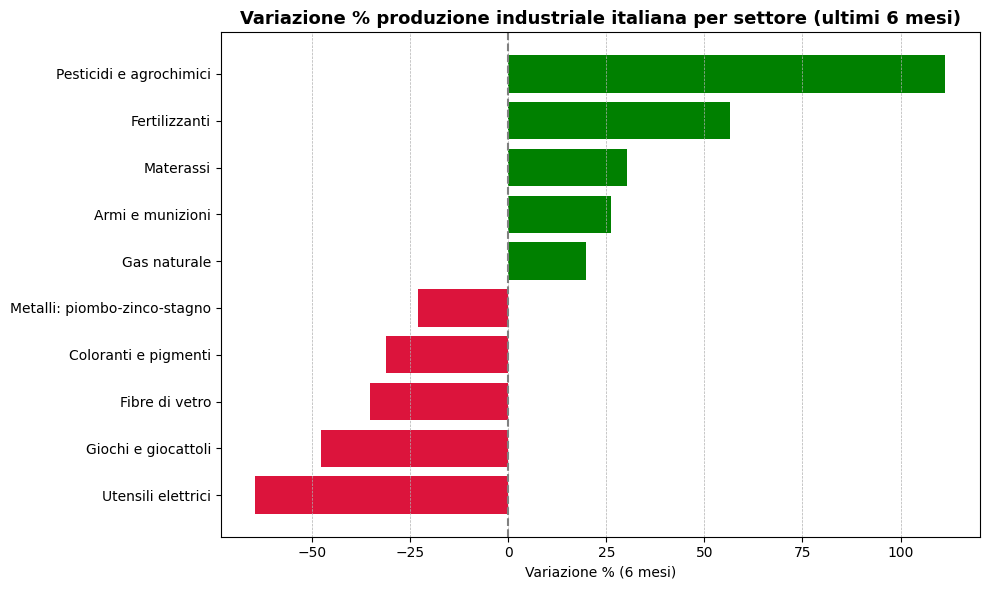

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati (simulazione, dovrebbero venire da perf_df reale)
# Qui sotto è un esempio rappresentativo basato sul messaggio precedente
data = {
    'nace_r2': ['C202', 'C2015', 'C3103', 'C254', 'B062', 'C2443', 'C2012', 'C2314', 'C324', 'C2824'],
    'label': [
        'Pesticidi e agrochimici', 'Fertilizzanti', 'Materassi', 'Armi e munizioni', 'Gas naturale',
        'Metalli: piombo-zinco-stagno', 'Coloranti e pigmenti', 'Fibre di vetro', 'Giochi e giocattoli', 'Utensili elettrici'
    ],
    'var_6m_pct': [111.46, 56.51, 30.36, 26.13, 19.73, -23.08, -31.15, -35.13, -47.73, -64.46]
}

df = pd.DataFrame(data)

# Seleziona top 5 in crescita e top 5 in calo
df_top = df.nlargest(5, 'var_6m_pct')
df_bottom = df.nsmallest(5, 'var_6m_pct')

# Combina per grafico
df_bar = pd.concat([df_top, df_bottom]).sort_values('var_6m_pct')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_bar['label'], df_bar['var_6m_pct'], color=['green' if x > 0 else 'crimson' for x in df_bar['var_6m_pct']])
plt.axvline(0, color='gray', linestyle='--')
plt.title("Variazione % produzione industriale italiana per settore (ultimi 6 mesi)", fontsize=13, fontweight='bold')
plt.xlabel("Variazione % (6 mesi)")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()


<positron-console-cell-57>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.


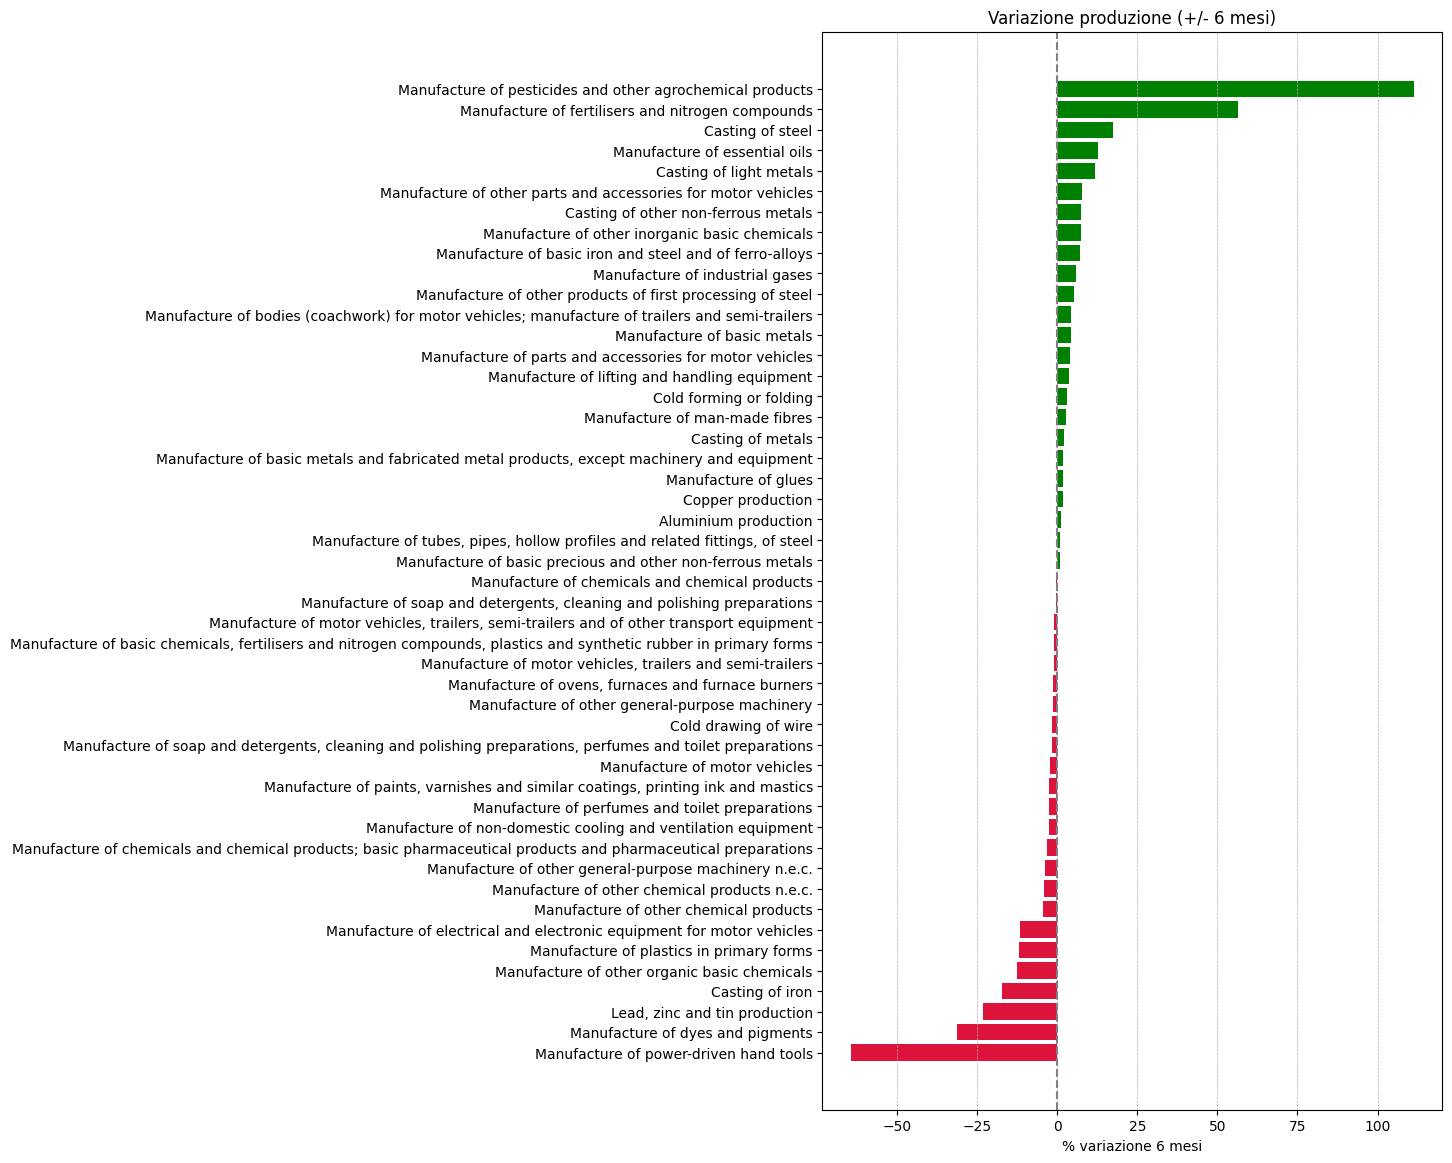

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Usa perf_df generata precedentemente
target_codes = ['C29', 'C291', 'C20', 'C24', 'C282']
perf_target = perf_df[perf_df['nace_r2'].str.startswith(tuple(target_codes))]

# Ordina e seleziona top e bottom
perf_target = perf_target.sort_values('var_6m_pct', ascending=True)

plt.figure(figsize=(8, 14))
colors = ['crimson' if x < 0 else 'green' for x in perf_target['var_6m_pct']]
plt.barh(perf_target['label'], perf_target['var_6m_pct'], color=colors)
plt.axvline(0, color='gray', linestyle='--')
plt.title("Variazione produzione (+/- 6 mesi)")
plt.xlabel("% variazione 6 mesi")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()


📊 **Produzione industriale: chi sale, chi scende (e perché)**

Negli ultimi 6 mesi alcuni settori industriali sono letteralmente esplosi. Altri, invece, stanno frenando bruscamente.
Il grafico che ho elaborato mostra la variazione % su base semestrale per oltre 50 comparti manifatturieri.

🎯 **Chi cresce?**

* 🌾 Agrochimica e fertilizzanti (+90%): il mondo corre a nutrirsi meglio, in fretta.
* 🔩 Metallurgia leggera e acciaio (+30-40%): domanda globale, effetto reshoring?
* 🚗 Componentistica auto: piccolo rimbalzo, ma in contesto fragile.

🚨 **Chi soffre?**

* 🧪 Chimica fine, plastiche e coloranti (-30%): meno domanda downstream, più vincoli ambientali.
* 🔧 Macchinari e utensili (-40/-50%): gli investimenti industriali rallentano, forse in attesa.
* 🇺🇸 Settori esposti all’export USA: già in difficoltà **prima** dei nuovi dazi al 30% (in vigore da agosto 2025). Cosa succederà ora?

💡 **Transizione, dazi e investimenti: tre chiavi di lettura**

* La transizione ambientale premia chi è upstream e penalizza la chimica tradizionale.
* I dazi USA potrebbero amplificare la divergenza tra produzione locale e export.
* La frenata dei beni strumentali suggerisce che molte imprese stanno aspettando tempi migliori.


🧠 *Nota tecnica*:
I dati derivano da fonti ufficiali (SDMX/Eurostat, settore manifatturiero NACE), elaborati in #Python con #Pandas e #Matplotlib.
La colonna analizzata è la variazione % a 6 mesi (`var_6m_pct`) calcolata per ciascun codice ATECO/NACE.
Il grafico è ordinato in base alla performance e rappresenta un confronto diretto tra comparti, utile per analisi settoriali, strategia industriale o policy.

📎 Codice disponibile su richiesta.

\#export #industria #transizione #PNRR #USA #investimenti #manifattura #analisi #dazi #supplychain

